## Predicting House Prices using Advanced Regression Techniques

#### Source: Kaggle

Predicting sales prices of 1500 houses in Iowa based on 79 features.

In [1]:
#Importing Python Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../train.csv')
data.head()

#data.describe()
#data.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option('display.max_rows', 100)
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### Step-1: Missing Value Treatment 

In [4]:
#Handling Missing values

#checking how many values are missing(NaN) columnwise
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
#Missing value treatment for 'LotFrontage'

#filling the missing values with mean of the column and not zero as districts specify a minimum value for lot frontage >0
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace = True)

count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [6]:
#Missing value treatment for 'Alley'
data['Alley'].unique()
data['Alley'].value_counts()
#filling the missing values with 'noAlleyAccess' as specified in data descriptiion
data['Alley'].fillna('noAlleyAccess', inplace = True)

data['Alley'].value_counts()

noAlleyAccess    1369
Grvl               50
Pave               41
Name: Alley, dtype: int64

In [7]:
#Missing value treatment for 'MasVnrType'
data['MasVnrType'].unique()
data['MasVnrType'].value_counts()
#filling the missing values with 'None' which is also the highest occurring category in this column
data['MasVnrType'].fillna(data['MasVnrType'].value_counts().index[0], inplace = True)

data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [8]:
#Missing value treatment for 'MasVnrArea'

#filling the missing values with 0 as they correspond to 'None' in masonry veneer type
data['MasVnrArea'].fillna(0, inplace = True)

count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [9]:
#Missing Value treatment for Basement attributes

data['BsmtQual'].unique()
data['BsmtQual'].value_counts()

#Checking if the NaNs are in corresponding columns
filter_na = data['BsmtQual'].isnull()

data.loc[filter_na,['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

len(data.loc[filter_na,['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']])

37

In [10]:
#Missing value treatment for 'BsmtQual', 'BsmtCond', 'BsmtFinType1'

#filling the missing values with No Basement ('NoBsmt') as specified in data dictionary
data['BsmtQual'].fillna('NoBsmt', inplace = True)
data['BsmtCond'].fillna('NoBsmt', inplace = True)
data['BsmtFinType1'].fillna('NoBsmt', inplace = True)

count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

BsmtExposure      38
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [11]:
#Checking if the extra NaNs are in corresponding columns of 'BsmtExposure' and 'BsmtFinType2'
filter_na = data['BsmtExposure'].isnull()

data.loc[filter_na,['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
17,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
39,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
90,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
102,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
156,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
182,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
259,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
342,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
362,NoBsmt,NoBsmt,NaN,NoBsmt,NaN
371,NoBsmt,NoBsmt,NaN,NoBsmt,NaN


Two things are observed:

1. The extra NaN of 'BsmtExposure' doesn't correspond to the extra NaN in 'BsmtFinType2'; the remaining 37 cases match up. So, the 37 NaNs of 'BsmtExposure' and 'BsmtFinType2' can be imputed by 'NoBsmt' as done for other basement columns above.

2. The extra NaN of 'BsmtExposure' can be imputed with most frequently observed value corresponding to the given combination of good basement quality, typical basement condition and unfinished 'BsmtFinType1' & 'BsmtFinType2'.

The same is done below:

In [12]:
#Missing value treatment for 'BsmtExposure', 'BsmtFinType2' (for 37 common NaNs across all basement characteristics)

#filling the missing values with No Basement ('NoBsmt') as specified in data dictionary

data.loc[data['BsmtQual'] == 'NoBsmt', 'BsmtExposure'] = 'NoBsmt'
data.loc[data['BsmtQual'] == 'NoBsmt', 'BsmtFinType2'] = 'NoBsmt'

count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

BsmtExposure       1
BsmtFinType2       1
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [13]:
#Finding most frequently observed value of 'BsmtExposure' corresponding to the given combination of:
#good basement quality, typical basement condition and unfinished 'BsmtFinType1' & 'BsmtFinType2'

d2 = data.loc[(data['BsmtQual'] == 'Gd') & (data['BsmtCond'] == 'TA') & (data['BsmtFinType1'] == 'Unf') & (data['BsmtFinType2'] == 'Unf'),['BsmtExposure']]
d2['BsmtExposure'].value_counts()

No    136
Av     26
Mn     10
Gd      5
Name: BsmtExposure, dtype: int64

In [14]:
#'No' (No exposure is most frequently observed), so imputing the extra missing value of 'BsmtExposure' with 'No'
data['BsmtExposure'].fillna('No', inplace = True)

count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

BsmtFinType2       1
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [15]:
#Similarly, for the one remaining missing value in 'BsmtFinType2', we will check it's corresponding basement caharacteristics

filter_na = data['BsmtFinType2'].isnull()
data.loc[filter_na,['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
332,Gd,TA,No,GLQ,NaN


In [16]:
#For the observed combination, we will find most frequently observed value of 'BsmtFinType2'
d2 = data.loc[(data['BsmtQual'] == 'Gd') & (data['BsmtCond'] == 'TA') & (data['BsmtExposure'] == 'No') & (data['BsmtFinType1'] == 'GLQ'),['BsmtFinType2']]
d2['BsmtFinType2'].value_counts()

Unf    126
LwQ      1
Rec      1
Name: BsmtFinType2, dtype: int64

In [17]:
#'Unf' (Unfinshed is most frequently observed), so imputing the extra missing value of 'BsmtFinType2' with 'Unf'
data['BsmtFinType2'].fillna('Unf', inplace = True)

count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [18]:
#Missing value treatment for 'Electrical'

data['Electrical'].value_counts() #'SBrkr' appears 1334 times

#filling the missing values with 'SBrkr' which is also the highest occurring category in this column
data['Electrical'].fillna(data['Electrical'].value_counts().index[0], inplace = True)


In [19]:
#Missing value treatment for 'FireplaceQu'
data['FireplaceQu'].unique()

#filling the missing values with 'NoFireplace' as specified in data descriptiion
data['FireplaceQu'].fillna('NoFireplace', inplace = True)

data['FireplaceQu'].value_counts()


NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64

In [20]:
#Missing value treatment for 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'

#Checking if the NaNs are in corresponding columns of 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'

filter_na = data['GarageType'].isnull()
data.loc[filter_na,['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]

len(data.loc[filter_na,['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']])

81

In [21]:
#filling the missing values with 'NoGarage' as specified in data descriptiion
data['GarageType'].fillna('NoGarage', inplace = True)
data['GarageYrBlt'].fillna(data['YearBuilt'], inplace = True)
data['GarageFinish'].fillna('NoGarage', inplace = True)
data['GarageQual'].fillna('NoGarage', inplace = True)
data['GarageCond'].fillna('NoGarage', inplace = True)

count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64


In [22]:
#Missing value treatment for 'PoolQC'

data['PoolQC'].unique()

#filling the missing values with 'NoPool' as specified in data descriptiion
data['PoolQC'].fillna('NoPool', inplace = True)

data['PoolQC'].value_counts()

NoPool    1453
Gd           3
Fa           2
Ex           2
Name: PoolQC, dtype: int64

In [23]:
#Missing value treatment for 'Fence'

data['Fence'].unique()

#filling the missing values with 'NoFence' as specified in data descriptiion
data['Fence'].fillna('NoFence', inplace = True)

data['Fence'].value_counts()

NoFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64

In [24]:
#Missing value treatment for 'MiscFeature'

data['MiscFeature'].unique()

#filling the missing values with 'None' as specified in data descriptiion
data['MiscFeature'].fillna('None', inplace = True)

data['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [25]:
#End of Missing value treatment
count_nan = data.isnull().sum()
print(count_nan[count_nan > 0])

Series([], dtype: int64)


### Step-2: Visualization

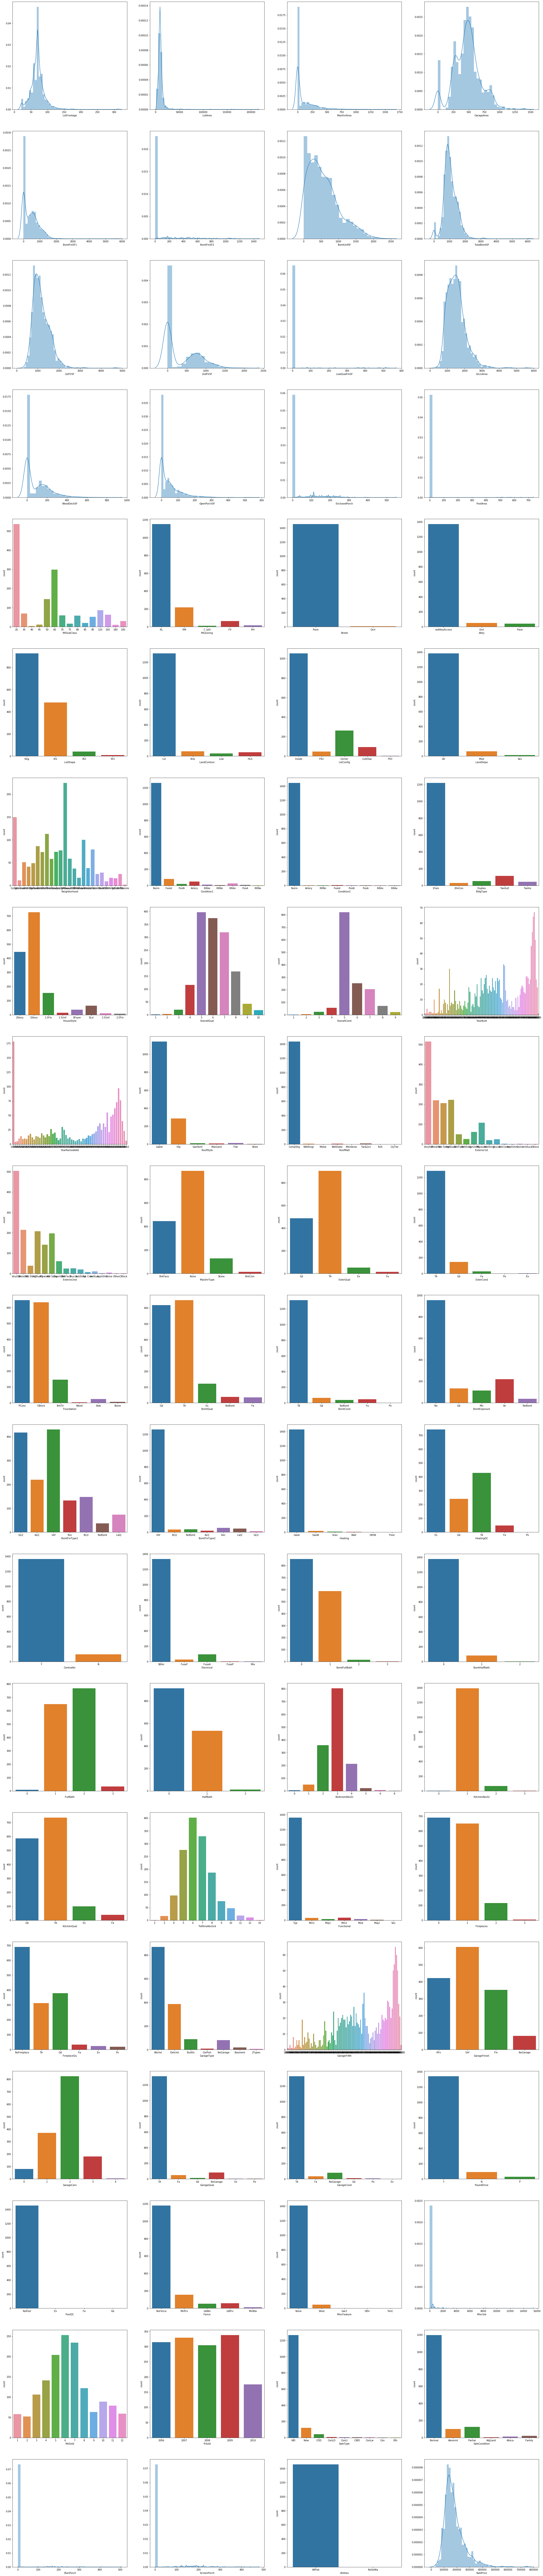

In [26]:
figure, ax = plt.subplots(20,4, figsize=(40,200))

#See the distrubution of the data
sns.distplot(data['LotFrontage'],ax= ax[0,0])
sns.distplot(data['LotArea'],ax=ax[0,1])
sns.distplot(data['MasVnrArea'],ax= ax[0,2])
sns.distplot(data['GarageArea'],ax= ax[0,3])

sns.distplot(data['BsmtFinSF1'],ax= ax[1,0])
sns.distplot(data['BsmtFinSF2'],ax=ax[1,1])
sns.distplot(data['BsmtUnfSF'],ax= ax[1,2])
sns.distplot(data['TotalBsmtSF'],ax= ax[1,3])

sns.distplot(data['1stFlrSF'],ax= ax[2,0])
sns.distplot(data['2ndFlrSF'],ax=ax[2,1])
sns.distplot(data['LowQualFinSF'],ax= ax[2,2])
sns.distplot(data['GrLivArea'],ax= ax[2,3])

sns.distplot(data['WoodDeckSF'],ax= ax[3,0])
sns.distplot(data['OpenPorchSF'],ax=ax[3,1])
sns.distplot(data['EnclosedPorch'],ax= ax[3,2])
sns.distplot(data['PoolArea'],ax= ax[3,3])

sns.countplot(data['MSSubClass'],ax= ax[4,0])
sns.countplot(data['MSZoning'],ax=ax[4,1])
sns.countplot(data['Street'],ax= ax[4,2])
sns.countplot(data['Alley'],ax= ax[4,3])

sns.countplot(data['LotShape'],ax=ax[5,0])
sns.countplot(data['LandContour'],ax= ax[5,1])
sns.countplot(data['LotConfig'],ax= ax[5,2])
sns.countplot(data['LandSlope'],ax= ax[5,3])

sns.countplot(data['Neighborhood'],ax=ax[6,0])
sns.countplot(data['Condition1'],ax= ax[6,1])
sns.countplot(data['Condition2'],ax= ax[6,2])
sns.countplot(data['BldgType'],ax= ax[6,3])

sns.countplot(data['HouseStyle'],ax=ax[7,0])
sns.countplot(data['OverallQual'],ax= ax[7,1])
sns.countplot(data['OverallCond'],ax= ax[7,2])
sns.countplot(data['YearBuilt'],ax= ax[7,3])

sns.countplot(data['YearRemodAdd'],ax=ax[8,0])
sns.countplot(data['RoofStyle'],ax= ax[8,1])
sns.countplot(data['RoofMatl'],ax= ax[8,2])
sns.countplot(data['Exterior1st'],ax= ax[8,3])

sns.countplot(data['Exterior2nd'],ax=ax[9,0])
sns.countplot(data['MasVnrType'],ax= ax[9,1])
sns.countplot(data['ExterQual'],ax= ax[9,2])
sns.countplot(data['ExterCond'],ax= ax[9,3])

sns.countplot(data['Foundation'],ax=ax[10,0])
sns.countplot(data['BsmtQual'],ax= ax[10,1])
sns.countplot(data['BsmtCond'],ax= ax[10,2])
sns.countplot(data['BsmtExposure'],ax= ax[10,3])

sns.countplot(data['BsmtFinType1'],ax=ax[11,0])
sns.countplot(data['BsmtFinType2'],ax= ax[11,1])
sns.countplot(data['Heating'],ax= ax[11,2])
sns.countplot(data['HeatingQC'],ax= ax[11,3])

sns.countplot(data['CentralAir'],ax=ax[12,0])
sns.countplot(data['Electrical'],ax= ax[12,1])
sns.countplot(data['BsmtFullBath'],ax= ax[12,2])
sns.countplot(data['BsmtHalfBath'],ax= ax[12,3])

sns.countplot(data['FullBath'],ax=ax[13,0])
sns.countplot(data['HalfBath'],ax= ax[13,1])
sns.countplot(data['BedroomAbvGr'],ax= ax[13,2])
sns.countplot(data['KitchenAbvGr'],ax= ax[13,3])

sns.countplot(data['KitchenQual'],ax=ax[14,0])
sns.countplot(data['TotRmsAbvGrd'],ax= ax[14,1])
sns.countplot(data['Functional'],ax= ax[14,2])
sns.countplot(data['Fireplaces'],ax= ax[14,3])

sns.countplot(data['FireplaceQu'],ax=ax[15,0])
sns.countplot(data['GarageType'],ax= ax[15,1])
sns.countplot(data['GarageYrBlt'],ax= ax[15,2])
sns.countplot(data['GarageFinish'],ax= ax[15,3])

sns.countplot(data['GarageCars'],ax=ax[16,0])
sns.countplot(data['GarageQual'],ax= ax[16,1])
sns.countplot(data['GarageCond'],ax= ax[16,2])
sns.countplot(data['PavedDrive'],ax= ax[16,3])

sns.countplot(data['PoolQC'],ax=ax[17,0])
sns.countplot(data['Fence'],ax= ax[17,1])
sns.countplot(data['MiscFeature'],ax= ax[17,2])
sns.distplot(data['MiscVal'],ax= ax[17,3])

sns.countplot(data['MoSold'],ax=ax[18,0])
sns.countplot(data['YrSold'],ax= ax[18,1])
sns.countplot(data['SaleType'],ax= ax[18,2])
sns.countplot(data['SaleCondition'],ax= ax[18,3])

sns.distplot(data['3SsnPorch'],ax= ax[19,0])
sns.distplot(data['ScreenPorch'],ax=ax[19,1])
sns.countplot(data['Utilities'],ax= ax[19,2])
sns.distplot(data['SalePrice'],ax= ax[19,3])

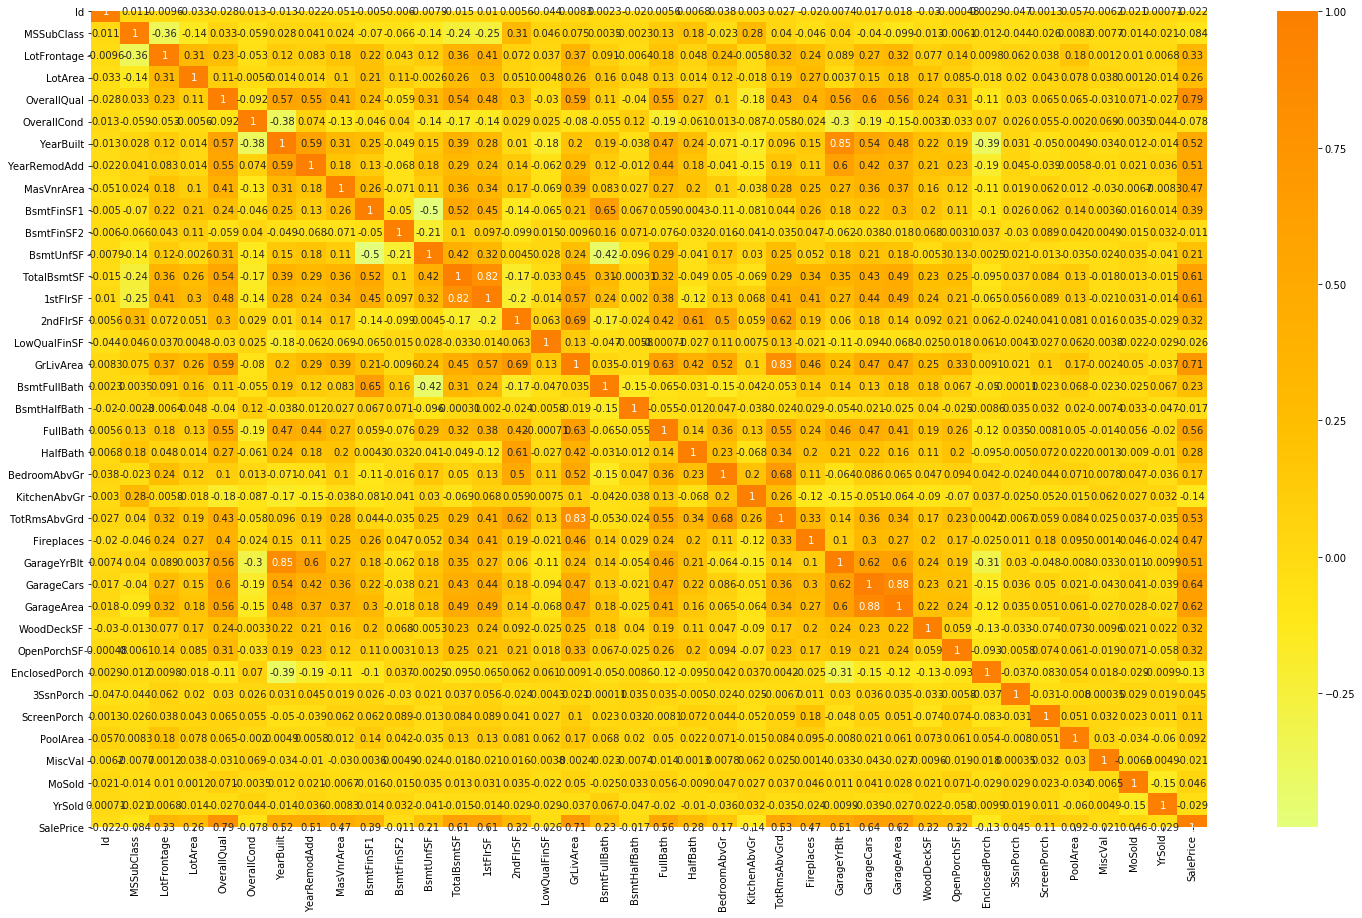

In [27]:
#Lets look at correlation:
plt.subplots(figsize=(25,15))
corr = data.corr()

sns.heatmap(corr, cmap = 'Wistia', annot= True)
plt.show(sns)

## Feature Encoding

In [28]:
#Python libraries for converting categorical data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [29]:
#Extracting all the columns with 'object'- type
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [30]:
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_data = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))

# One-hot encoding removed index; putting it back
OH_cols_data.index = data.index
#OH_cols_data.head()

# Remove categorical columns (will replace with one-hot encoding)
num_data = data.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_data = pd.concat([num_data, OH_cols_data], axis=1)

In [31]:
#Making 'Id' column index for the dataset
OH_data.set_index('Id', inplace = True)
isinstance(OH_data, pd.DataFrame)

True

## Model Building 

In [32]:
#Creating X and y-features for the model
y_final = OH_data.SalePrice
X_final = OH_data.drop('SalePrice', axis =1)

In [33]:
#Dividing the data into train and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.33, random_state=0)

In [34]:
#Model-1: Random forest Regression
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)

#fit model
forest.fit(X_train,y_train)
#y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#calculating rmse
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.log(y_test), np.log(y_test_pred)))

0.13399863920200594

In [35]:
#Model-2: XG-Boost
from xgboost import XGBRegressor

#after multiple iterations with different parameters and their values, following combination was selected
my_model = XGBRegressor(colsample_bytree=0.4603, gamma=.0468,
                             learning_rate=0.02, max_depth=4,
                             min_child_weight=1.7817, n_estimators=800,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =8, nthread = -1)

#fit model
my_model.fit(X_train, y_train)
y_train_pred = my_model.predict(X_train)
y_test_pred = my_model.predict(X_test)

#calculating rmse
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(np.log(y_test), np.log(y_test_pred)))

0.1172118367788273

Clearly, XG-Boost is giving better results.

Next, we will use this model on test data to get y_pred values.

## Pre-processing test data

In [36]:
#Loading test dataset
test_data = pd.read_csv('../test.csv', index_col=0)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Missing Value Treatment for Test Data

In [37]:
#Checking missing values across columns

count_nan = test_data.isnull().sum()
print(count_nan[count_nan > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


In [38]:
#Handling Missing Values in test data

#Treating missing values in 'MSZoning' - by replacing 4 NaNs with mode of the column
test_data['MSZoning'].fillna(test_data['MSZoning'].value_counts().index[0], inplace = True) 

In [39]:
#Missing value treatment for 'LotFrontage'

#filling the missing values with mean of the column and not zero as districts specify a minimum value for lot frontage >0
test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean(), inplace = True)

In [40]:
#Missing value treatment for 'Alley'

#filling the missing values with 'noAlleyAccess' as specified in data descriptiion
test_data['Alley'].fillna('noAlleyAccess', inplace = True)

In [41]:
#Treating missing values in 'Utilities' - by replacing NaNs with mode of the column
test_data['Utilities'].fillna(test_data['Utilities'].value_counts().index[0], inplace = True) 

In [42]:
#Treating missing values in 'Exterior1st' and 'Exterior2nd' - by replacing NaNs with mode of the column
test_data['Exterior1st'].fillna(test_data['Exterior1st'].value_counts().index[0], inplace = True)
test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].value_counts().index[0], inplace = True)

In [43]:
#Treating missing values in 'MasVnrType' - replacing NaNs with mode of column
test_data['MasVnrType'].fillna(test_data['MasVnrType'].value_counts().index[0], inplace = True)

#Missing value treatment for 'MasVnrArea'- replacing with 0 as they correspond to 'None' in masonry veneer type
test_data['MasVnrArea'].fillna(0, inplace = True)

In [44]:
#Missing value treatment for 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'

#filling the missing values with No Basement ('NoBsmt') as specified in data dictionary
test_data['BsmtQual'].fillna('NoBsmt', inplace = True)
test_data['BsmtCond'].fillna('NoBsmt', inplace = True)
test_data['BsmtExposure'].fillna('NoBsmt', inplace = True)
test_data['BsmtFinType1'].fillna('NoBsmt', inplace = True)
test_data['BsmtFinType2'].fillna('NoBsmt', inplace = True)

In [45]:
#Missing Value treatment for 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'

#filling the missing value with 0 as they correspond to 'NoBsmt'
test_data['BsmtFinSF1'].fillna(0, inplace = True)
test_data['BsmtFinSF2'].fillna(0, inplace = True)
test_data['BsmtUnfSF'].fillna(0, inplace = True)
test_data['TotalBsmtSF'].fillna(0, inplace = True)

In [46]:
#Missing Value treatment for 'BsmtFullBath', 'BsmtHalfBath' -filling the missing values with 0 as they correspond to 'NoBsmt'
test_data['BsmtFullBath'].fillna(0, inplace = True)
test_data['BsmtHalfBath'].fillna(0, inplace = True)

In [47]:
#Missing value treatment for 'KitchenQual' and 'Functional' - filling modes of resp. columns

test_data['KitchenQual'].fillna(test_data['KitchenQual'].value_counts().index[0], inplace = True)
test_data['Functional'].fillna(test_data['Functional'].value_counts().index[0], inplace = True)

#Missing value treatment for 'FireplaceQu'- filling 'NoFireplace' as specified in data descriptiion
test_data['FireplaceQu'].fillna('NoFireplace', inplace = True)

In [48]:
#Missing value treatment for 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'

#filling the missing values with 'NoGarage' as specified in data descriptiion
test_data['GarageType'].fillna('NoGarage', inplace = True)
test_data['GarageYrBlt'].fillna(test_data['YearBuilt'], inplace = True)
test_data['GarageFinish'].fillna('NoGarage', inplace = True)
test_data['GarageCars'].fillna(0, inplace = True)
test_data['GarageArea'].fillna(0, inplace = True)
test_data['GarageQual'].fillna('NoGarage', inplace = True)
test_data['GarageCond'].fillna('NoGarage', inplace = True)

In [49]:
#Missing value treatment in 'Utilities' - filling with 'NoPool' as specified in data description
test_data['PoolQC'].fillna('NoPool', inplace = True)

In [50]:
#Missing value treatment in 'Fence' - filling with 'NoFence' as specified in data description
test_data['Fence'].fillna('NoFence', inplace = True)

In [51]:
#Missing value treatment in 'MiscFeature' - filling with 'None' as specified in data description
test_data['MiscFeature'].fillna('None', inplace = True)

In [52]:
#Treating missing values in 'SaleType' - by replacing NaNs with mode of the column
test_data['SaleType'].fillna(test_data['SaleType'].value_counts().index[0], inplace = True) 

In [53]:
#End of Missing Value Treatment
count_nan = test_data.isnull().sum()
print(count_nan[count_nan > 0])

Series([], dtype: int64)


### Feature Encoding for Test Data

In [54]:
#Extracting all the columns with 'object'- type
s = (test_data.dtypes == 'object')
object_cols = list(s[s].index)
print(object_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [55]:
# Apply one-hot encoder to each column with categorical data

OH_cols_test_data = pd.DataFrame(OH_encoder.transform(test_data[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_test_data.index = test_data.index

# Remove categorical columns (will replace with one-hot encoding)
num_test_data = test_data.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_test_data = pd.concat([num_test_data, OH_cols_test_data], axis=1)

### Using trained model (XG-Boost) to predict y - values of test data

In [56]:

y_final = OH_data.SalePrice
X_final = OH_data.drop('SalePrice', axis =1)

my_model = XGBRegressor(colsample_bytree=0.4603, gamma=.0468,
                             learning_rate=0.02, max_depth=4,
                             min_child_weight=1.7817, n_estimators=800,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =0, nthread = -1)

#fit model
my_model.fit(X_final, y_final)
#y_pred = my_model.predict(OH_test_data)

y_pred = pd.DataFrame(my_model.predict(OH_test_data))

y_pred.to_csv("model_output3.csv")

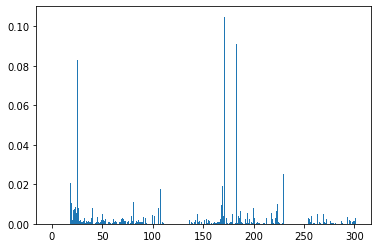

In [58]:
# plotting important features as considered by this model
plt.bar(range(len(my_model.feature_importances_)), my_model.feature_importances_)
plt.show()

In [59]:
print(my_model.feature_importances_)

[1.6736297e-03 2.5734841e-03 5.3254194e-03 9.0347745e-02 2.7035212e-03
 7.5349733e-03 4.8030200e-03 2.6420008e-03 8.5289348e-03 1.0820554e-03
 1.2084420e-03 9.5225601e-03 1.1598018e-02 1.0299523e-02 1.0299652e-03
 2.4130754e-02 2.2259320e-03 5.5409753e-04 2.0600453e-02 1.0733823e-02
 1.9939477e-03 6.9618905e-03 7.5524747e-03 8.5357614e-03 5.4555130e-03
 8.2826033e-02 8.2012257e-03 1.5411599e-03 1.7739841e-03 6.7200314e-04
 7.6474337e-04 1.6113106e-03 2.9028009e-03 1.8748586e-04 1.3187755e-03
 8.2915707e-04 1.5029619e-03 1.1153696e-03 1.0404642e-03 3.1420484e-03
 8.2444092e-03 0.0000000e+00 0.0000000e+00 2.5992055e-04 7.1815192e-04
 3.5667918e-03 8.6559192e-04 6.3859724e-04 7.4346294e-04 1.8347114e-03
 5.1269629e-03 1.6950923e-03 1.4009223e-03 2.2908722e-03 0.0000000e+00
 0.0000000e+00 7.9504284e-04 1.1578284e-03 5.8059389e-04 0.0000000e+00
 5.7036366e-04 2.3598536e-03 8.7808655e-04 1.2631750e-03 8.1478606e-04
 0.0000000e+00 0.0000000e+00 8.0443471e-04 1.0224817e-03 2.5671895e-03
 2.882

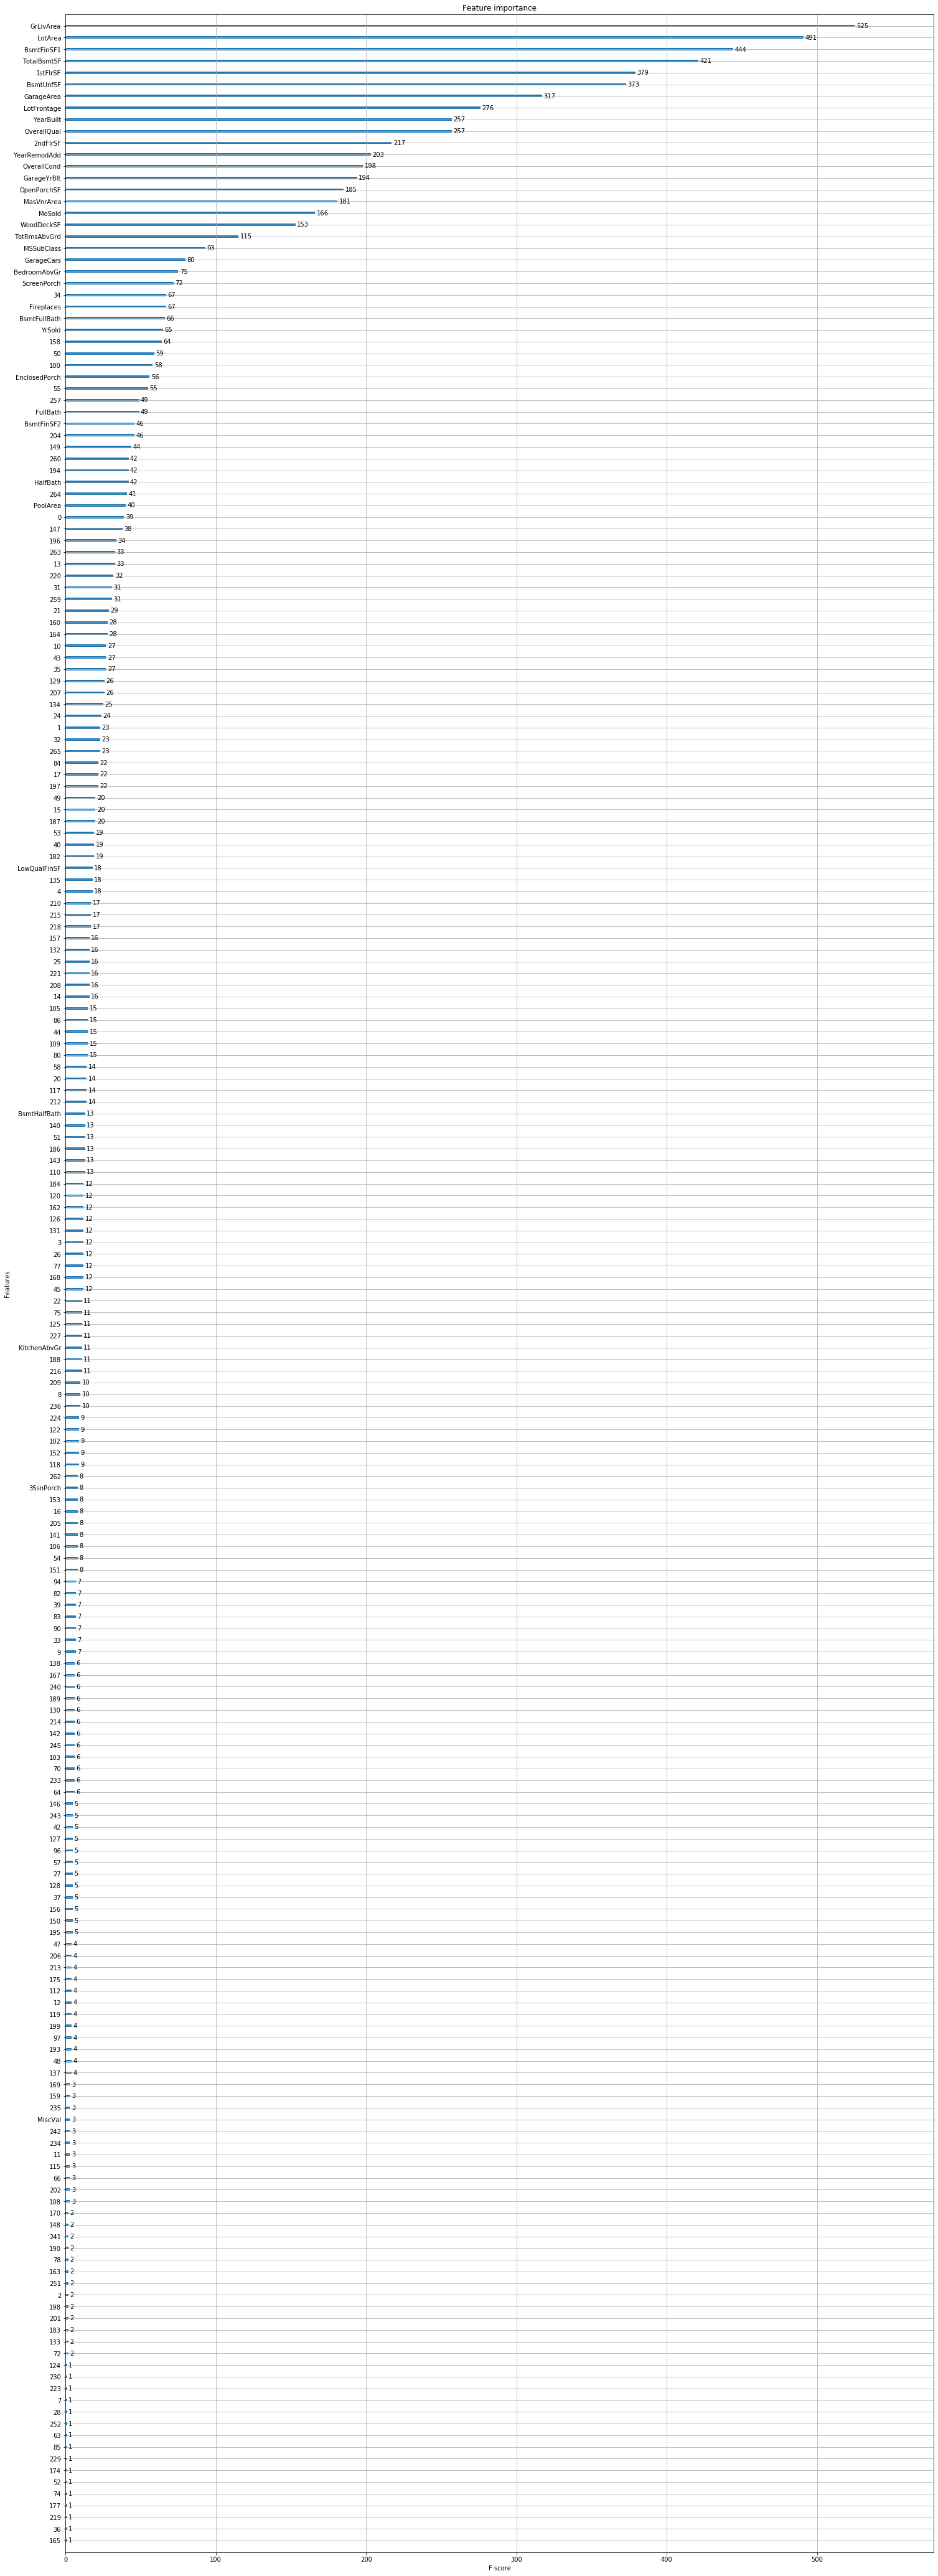

In [73]:
# Using XG-boost built in feature importance plot
from xgboost import plot_importance

plot_importance(my_model)
plt.gcf().set_size_inches(25, 75)
#plt.show()

Clearly, the most important features are (based on F-score>300): 
1. Above ground living area square feet
2. Lot size in square feet
3. Basement finished square feet (type 1)
4. Total square feet of basement area
5. First floor square feet
6. Unfinished square feet of basement area
7. Size of garage in square feet
